# Unsupervised Learning Project

1. Import Data

In [4]:
# Importar needed libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'seaborn'

In [5]:
# Import and integrate data

bookme_data = pd.read_csv('cluster.csv')
bookme_data

# 15589 rows x 21 columns

# Não há propriamente nenhuma primary key nesta tabela (ex:um customer ID). O índice da tabela é automaticamente criado (à)
# esquerda na tabela.

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,3,2,4,3,4,5,1,3,4,3
15585,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,5,3,5,5,3,1,3,4,4,5
15586,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,3,4,5,4,4,4,4,5,4,4
15587,nochurn,Mr. Gregory Moran,yes,1992.0,leisure,double,5155,4,3,4,...,5,4,5,5,2,5,4,3,4,5


In [6]:
# Check for duplicates and drop them

bookme_data[bookme_data.duplicated(keep = False)]

# 6 duplicate rows (3 pares)

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
8194,nochurn,Ms. Abigail York,yes,1995.0,leisure,double,5098,5,5,5,...,4,5,5,3,3,4,3,3,3,5
8195,nochurn,Ms. Abigail York,yes,1995.0,leisure,double,5098,5,5,5,...,4,5,5,3,3,4,3,3,3,5
9175,churn,Ms. Abigail Kennedy,yes,1991.0,business,suite,5932,3,3,2,...,3,3,3,3,4,1,4,3,4,3
9176,churn,Ms. Abigail Kennedy,yes,1991.0,business,suite,5932,3,3,2,...,3,3,3,3,4,1,4,3,4,3
9416,nochurn,Ms. Abigail Buchanan,yes,1972.0,business,double,6769,5,4,4,...,5,5,4,5,5,5,5,2,5,1
9417,nochurn,Ms. Abigail Buchanan,yes,1972.0,business,double,6769,5,4,4,...,5,5,4,5,5,5,5,2,5,1


In [7]:
# Drop duplicate rows

bookme_data.drop_duplicates(inplace = True) 
bookme_data

# 15586 rows x 21 columns

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,3,2,4,3,4,5,1,3,4,3
15585,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,5,3,5,5,3,1,3,4,4,5
15586,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,3,4,5,4,4,4,4,5,4,4
15587,nochurn,Mr. Gregory Moran,yes,1992.0,leisure,double,5155,4,3,4,...,5,4,5,5,2,5,4,3,4,5


2. Explore Data

In [5]:
bookme_data.shape

(15586, 21)

In [6]:
bookme_data.info()

# Não há nulls neste data frame.

# A maioria das variáevis são inteiros - classificação entre 0 e 5 para várias as várias dimensões que o cliente pode avaliar

# Churn - churn significa que o cliente abandonou o serviço; no churn significa o oposto.

# Year_Birth - é um float, o que talvez não se justifique. A partir dele será possível calcular a idade.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15586 entries, 0 to 15588
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15586 non-null  object 
 1   Name               15586 non-null  object 
 2   Longevity          15586 non-null  object 
 3   Year_Birth         15391 non-null  float64
 4   TypeTravel         15586 non-null  object 
 5   RoomType           15586 non-null  object 
 6   RewardPoints       15586 non-null  int64  
 7   Comfort            15586 non-null  int64  
 8   ReceptionSchedule  15586 non-null  int64  
 9   FoodDrink          15586 non-null  int64  
 10  Location           15586 non-null  int64  
 11  Wifi               15586 non-null  int64  
 12  Amenities          15586 non-null  int64  
 13  Staff              15586 non-null  int64  
 14  OnlineBooking      15586 non-null  int64  
 15  PriceQuality       15586 non-null  int64  
 16  RoomSpace          155

2.1. Statistical Exploration for Numerical Variables

In [7]:
bookme_data.describe().T

# Year_Birth: não temos disponíveis alguns anos de nascimento. Para além disso, é atípico que o ano de nascimento mais recente
# seja 2014, o que indica que há pessoas com atualmente 8 anos a utilizarem o serviço.
# Temos valores para todas as restantes variáveis.
# RewardPoints: desvio padrão elevado mas a média e mediana também são. Temos de investigar melhor esta variável.
# Restantes variáveis devem variar entre 0 e 5. Há umas que têm a classificação mínima de 1, o que é válido. Quanto ao valor
# máximo, reparamos que Wifi tem valor máximo de 6, o que não é possível e terá de ser resolvido nos passos seguintes.

# Por comparação dos valores da média e mediana para as várias variáveis numéricas, percebemos que estes são sensivelmente
# semelhantes para todas elas. Isto indica que as distribuições seguem, aproximadamente, um perfil normal. Não significa que
# algumas não possam apresentar alguma skweeness e, consequentemente, alguns valores de kurtosis moderados, mas não deverão
# constituir situações de "alarme".

,count,mean,std,min,25%,50%,75%,max
Year_Birth,15391.0,1981.705607,15.179757,1936.0,1970.0,1981.0,1994.00,2014.0
RewardPoints,15586.0,5022.418581,1027.940126,409.0,4445.0,5088.0,5648.75,6950.0
Comfort,15586.0,2.841332,1.388541,0.0,2.0,3.0,4.00,5.0
ReceptionSchedule,15586.0,2.997049,1.519035,0.0,2.0,3.0,4.00,5.0
FoodDrink,15586.0,2.844412,1.436937,0.0,2.0,3.0,4.00,5.0
Location,15586.0,2.985821,1.299438,1.0,2.0,3.0,4.00,5.0
Wifi,15586.0,3.244963,1.327064,0.0,2.0,3.0,4.00,6.0
Amenities,15586.0,3.374631,1.352419,0.0,2.0,4.0,4.00,5.0
Staff,15586.0,3.506288,1.319625,1.0,3.0,4.0,5.00,5.0
OnlineBooking,15586.0,3.454190,1.310401,0.0,2.0,4.0,5.00,5.0


In [8]:
# Skewness

bookme_data.skew()

# Moderate skewness (between |0.5| and |1.0|): RewardPoints, Amenities, Staff, PriceQuality, CheckOut, Cleanliness
# High skewness (higher than |1.0|): não se verifica nenhuma variável que apresente uma distribuição "skewed"

C:\Users\anabb\AppData\Local\Temp/ipykernel_13140/38272465.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bookme_data.skew()


Year_Birth          -0.003724
RewardPoints        -0.453744
Comfort             -0.100806
ReceptionSchedule   -0.260518
FoodDrink           -0.123543
Location            -0.050057
Wifi                -0.171105
Amenities           -0.599424
Staff               -0.554468
OnlineBooking       -0.472109
PriceQuality        -0.503290
RoomSpace           -0.482872
CheckOut            -0.750667
Checkin             -0.382822
Cleanliness         -0.745109
BarService          -0.358340
dtype: float64

In [7]:
bookme_data[['RewardPoints','Amenities','Staff','PriceQuality','CheckOut','Cleanliness']].kurt()

# Não há valores de kurtosis particularmente elevados para nenhuma destas variáveis. Pode verificar-se posteriormente se existem
# ou não outliers.

RewardPoints    0.260162
Amenities      -0.540790
Staff          -0.859138
PriceQuality   -0.772889
CheckOut       -0.225208
Cleanliness    -0.225374
dtype: float64

2.2. Statistical Exploration for Categorical Variables

In [10]:
# Main descriptive statistics for categorical variables

bookme_data.describe(include = ['O'])

# Não há "unary" variables.
# Churn: a maioria das observações tem associado o valor 'nochurn', logo a maioria não abandona o serviço. Pode investigar-se
# mais.
# Name: nada a reportar.
# Longevity: segundo o enunciado, dá a informação se "whether the customer registered more than 1 year ago or not" e só admite
# dois valores possíveis (yes ou no). No entanto, é dada a indicação de que há 3 valores únicos, o que será necessário
# investigar.
# TypeTravel: nada a reportar. Só pode assumir dois valores (business or leisure). Pode investigar-se mais.
# RoomType: nada a reportar. Pode investigar-se mais.

,Churn,Name,Longevity,TypeTravel,RoomType
count,15586,15586,15586,15586,15586
unique,2,14227,3,2,3
top,nochurn,Mr. Michael Smith,yes,business,single
freq,8475,9,12545,10754,7442


In [11]:
bookme_data['Churn'].value_counts()

nochurn    8475
churn      7111
Name: Churn, dtype: int64

In [12]:
bookme_data['Longevity'].value_counts()

# Temos 167 observações com o valor 'y' -> possivelmente corresponderão a um 'yes' e poder-lhe-emos atribuir esse valor

yes    12545
no      2874
y        167
Name: Longevity, dtype: int64

In [13]:
bookme_data['TypeTravel'].value_counts()

business    10754
leisure      4832
Name: TypeTravel, dtype: int64

In [14]:
bookme_data['RoomType'].value_counts()

single    7442
double    7019
suite     1125
Name: RoomType, dtype: int64

3. Visual Exploration

3.1. Numerical Variables

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

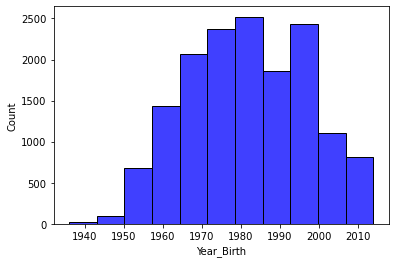

In [15]:
# Histograms - check distribution of variables

sns.histplot(bookme_data['Year_Birth'], color="b", bins = 11)
#sns.histplot(bookme_data['RewardPoints'], color="b", bins = 10) # skewed
#sns.histplot(bookme_data['Comfort'], color="b", bins = 5)
#sns.histplot(bookme_data['ReceptionSchedule'], color="b", bins = 5)
#sns.histplot(bookme_data['FoodDrink'], color="b", bins = 5)
#sns.histplot(bookme_data['Location'], color="b", bins = 5)
#sns.histplot(bookme_data['Wifi'], color="b", bins = 6)
#sns.histplot(bookme_data['Amenities'], color="b", bins = 5) # skewed
#sns.histplot(bookme_data['Staff'], color="b", bins = 5) # skewed
#sns.histplot(bookme_data['OnlineBooking'], color="b", bins = 5) # skewed
#sns.histplot(bookme_data['PriceQuality'], color="b", bins = 5)
#sns.histplot(bookme_data['RoomSpace'], color="b", bins = 5) # skewed
#sns.histplot(bookme_data['CheckOut'], color="b", bins = 5)
#sns.histplot(bookme_data['Checkin'], color="b", bins = 5)
#sns.histplot(bookme_data['Cleanliness'], color="b", bins = 5)
#sns.histplot(bookme_data['BarService'], color="b", bins = 5) # skewed

<AxesSubplot:>

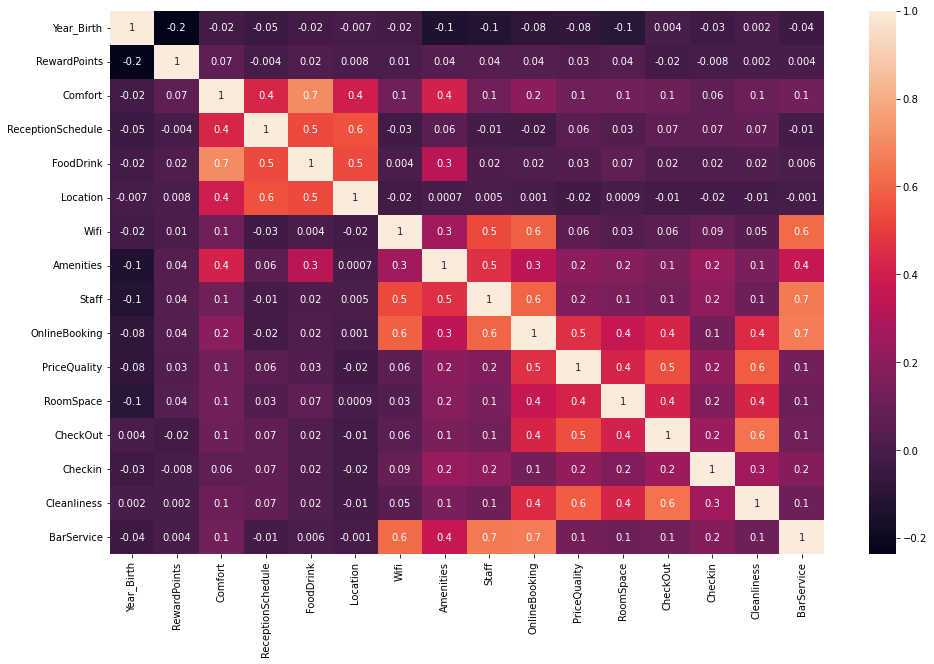

In [5]:
# Correlation Matrix

bookme_corr = bookme_data.corr(method = 'spearman') # use spearman correlation

# unsupervised learning (k-means) - columns with high correlation (> 0.7 approximately) -> some of them should be removed

figure = plt.figure(figsize=(16,10))
sns.heatmap(bookme_corr, annot=True, fmt = '.1g')

# Comfort and FoodDrink - high positive correlation of 0.7
# Staff and BarService - high positive correlation of 0.7
# OnlineBooking and BarService - high positve correlation of 0.7

<AxesSubplot:xlabel='Staff', ylabel='BarService'>

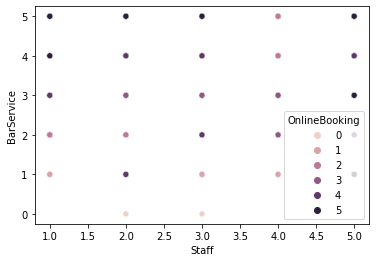

In [17]:
# Scatterplots

#sns.scatterplot(x = 'Comfort', y= 'FoodDrink', data = bookme_data)
#sns.scatterplot(x = 'Staff', y= 'BarService', data = bookme_data)
#sns.scatterplot(x = 'OnlineBooking', y= 'BarService', data = bookme_data)
sns.scatterplot(x = 'Staff', y= 'BarService', hue = 'OnlineBooking', data = bookme_data)

<AxesSubplot:xlabel='Wifi', ylabel='count'>

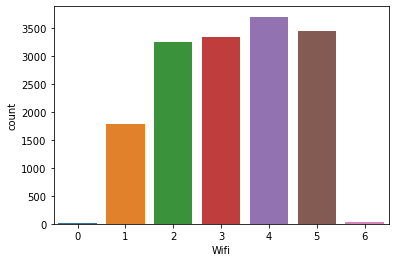

In [18]:
# Análise da classificação '6' na variável Wifi

sns.countplot(x = 'Wifi', data = bookme_data, order = [0,1,2,3,4,5,6])

3.2. Categorical Variables

In [ ]:
# Exploração feita pelos outros colegas

# a. Análise subsets Churn (churn vs no churn): observam-se diferenças na correlação com e entre variáveis após fazer esta
# divisão, o que sugere que esta variável possa ser distintiva ao realizar o profiling dos clusters após aplicação do algoritmo

# b. Há 3 clientes que dão a mesma classificação em todas as categorias (para os quais RoomType = 'single', TypeTravel =
# = 'business' e Longevity = 'yes'). Dada a heterogeneidade de quartos e características que se podem encontrar associados ao
# negócio, isto não deverá ser um problema. 

# c. Estudo da correlação das variáveis categóricas Churn, TypeTravel, RoomType, Longevity e Gender: podem sugerir alguns tipos
# de comportamentos associados aos clientes, o que pode ajudar no desenho da estratégia de marketing que temos de definir. A
# coluna Gender é criada a partir dos prefixos dos nomes das pessoas.

In-depth Exploration

In [19]:
# Nas próximas células, há um estudo da variável RewardPoints (maior desvio padrão, kurtosis e skweeness) contra algumas das
# variáveis categóricas do nosso data set. Já se tinha observado que a variável RewardPoints não apresentava correlação com
# outras variáveis numéricas. Esta análise pode, futuramente, ajudar a decidir se podem existir outliers associados à variável
# RewardPoints e a perceber qual a maneira de os acautelar, perante o contexto de negócio que estamos a considerar.

# Reward Points vs Longevity

bookme_data.groupby('Longevity')['RewardPoints'].median()
bookme_data.groupby('Longevity')['RewardPoints'].mean()

# não aparenta existir uma diferença significativa no número de RewardPoints entre quem se registou há mais ou menos de 1 ano

Longevity
no     4983.786360
y      5069.449102
yes    5030.642965
Name: RewardPoints, dtype: float64

In [20]:
# RewardPoints vs Room Type

bookme_data.groupby('RoomType')['RewardPoints'].median()
bookme_data.groupby('RoomType')['RewardPoints'].mean()

# não aparenta existir uma diferença significativa no número de RewardPoints e o tipo de quarto
# observa-se que quem está alojado num 'single' tem menos RewardPoints associados

RoomType
double    5188.882462
single    4834.105751
suite     5229.542222
Name: RewardPoints, dtype: float64

In [21]:
# RewardPoints vs TypeTravel

bookme_data.groupby('TypeTravel')['RewardPoints'].median()
bookme_data.groupby('TypeTravel')['RewardPoints'].mean()

# não aparenta existir uma diferença significativa no número de RewardPoints e o tipo de viagem
# observa-se que quem viaja por razões de negócio tem menos RewardPoints associados

TypeTravel
business    4933.134648
leisure     5221.127070
Name: RewardPoints, dtype: float64

In [22]:
#RewardPoints vs Churn

bookme_data.groupby('Churn')['RewardPoints'].median()
bookme_data.groupby('Churn')['RewardPoints'].mean()

# não aparenta existir uma diferença significativa no número de RewardPoints e se há ou não abandono do serviço

Churn
churn      4977.808747
nochurn    5059.848732
Name: RewardPoints, dtype: float64

In [23]:
# Averiguar se há clientes que respondem com classificação 0 em todas as variáveis relativas à satisfação

bookme_data.query('Comfort < 1').query('ReceptionSchedule < 1').query('FoodDrink < 1').query('Location <= 1').query('Wifi <= 1')

# não aparenta existir nenhum cliente que dê uma classificação de 0 (ou 1) em todos os parâmetros associados à satisfação

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
3372,nochurn,Mr. Kevin Thompson,no,2001.0,business,single,5431,0,0,0,...,1,0,1,1,5,4,4,4,4,1


In [24]:
# Averiguar se há clientes que respondem com classificação 5 em todas as variáveis relativas à satisfação

bookme_data.query('Comfort >= 5').query('ReceptionSchedule >= 5').query('FoodDrink >= 5').query('Location >=5').query('Wifi >= 5').query('Amenities >=5').query('Staff >=5').query('OnlineBooking >= 5').query('PriceQuality >= 5').query('RoomSpace >= 5').query('CheckOut >= 5').query('Checkin >= 5').query('Cleanliness >= 5').query('BarService >= 5')

# 1 cliente atribui o classificação 5 a todas as variáveis de satisfação

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
15259,nochurn,Mr. Randy Robbins,yes,1976.0,business,single,6699,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [25]:
# Verificamos que pode ser mais frequente que os clientes atribuam uma classificação elevada em todas as colunas relacionadas
# com a satisfação do que baixas classificações a estas variáveis.

# Ao interpretar estes resultados com os obtidos pelos outros colegas nas suas análises, e dado a heterogeneidade de quartos e
# serviços que podemos encontrar associados à plataforma BookMe, não vamos considerar para já estes registos como outliers.

In [11]:
#Recurrent Visits - exploration
rec_temp1 = pd.DataFrame(bookme_data[['Name', 'Year_Birth', 'Longevity']])
rec_temp1['Recurrent'] = rec_temp1['Name'].value_counts().to_frame()
#rec_temp1['Recurring']= rec_temp1['Name'].value_counts()
#if rec_temp1['Name'].value_counts() > 2 == True:
    #rec_temp3['Recurrent'] = rec_temp1['Name']
#else:
    #rec_temp3['Recurrent'] = 0
#rec_temp1['Recurrent'] = rec_temp1['Name'].value_counts() > 2
#rec_temp1['Recurrent'].value_counts()
#rec_temp2 = rec_temp2.merge(rec_temp1,how="outer")
#rec_temp2 = rec_temp2[rec_temp2['Name'] == True]
rec_temp1
#rec_temp2.count()
#rec_temp2

,Name,Year_Birth,Longevity,Recurrent
0,Ms. Nicole Clarke,1974.0,yes,NaN
1,Mr. Jesse Scott,1965.0,yes,NaN
2,Mr. Christopher Carter,1973.0,yes,NaN
3,Ms. Jennifer Morgan,1993.0,yes,NaN
4,Mr. Michael White,1989.0,yes,NaN
...,...,...,...,...
15584,Ms. Wendy Roberts,1988.0,no,NaN
15585,Ms. Sonya Smith,2000.0,no,NaN
15586,Mr. Maxwell Wright,1964.0,yes,NaN
15587,Mr. Gregory Moran,1992.0,yes,NaN


In [23]:
recur =  pd.DataFrame(bookme_data.groupby(['Name', 'Year_Birth','Longevity'])['Name'].count())
recur.rename(columns = {'Name':'Recurrent'}, inplace = True)
recur.query("Recurrent >= 2", inplace = True) #'Number_of_Visits >= 2'
type(recur)

pandas.core.frame.DataFrame

In [8]:
# Verificar quantas visitas repetidas temos de clientes com o mesmo nome

df_analise =  pd.DataFrame(bookme_data.groupby(['Name', 'Year_Birth'])['Name'].count())
df_analise.rename(columns = {'Name':'Number_of_Visits'}, inplace = True)
df_analise.query("Number_of_Visits >= 2", inplace = True) #'Number_of_Visits >= 2'
# df_analise.shape
df_analise

# Apenas 39 clientes com o mesmo nome e a mesma data de nascimento foram mais do que uma vez, a maioria 2 vezes. Estes clientes
# podem ser ou não a mesma pessoa, consoante as assunções que fizermos. Dado que o BookMe é uma plataforma de alcance mundial,
# a probabilidade de termos duas pessoas com o mesmo nome e o mesmo ano de nascimento é elevada, pelo que para já isto não
# constitui nenhum problema.

,,Number_of_Visits
Name,Year_Birth,
Mr. Andrew Collins,1975.0,2
Mr. Anthony Smith,1982.0,3
Mr. Brian Fisher,1975.0,2
Mr. Brian Smith,1979.0,2
Mr. Cameron Smith,1985.0,2
Mr. Charles Johnson,1971.0,2
Mr. Christopher Murphy,1966.0,2
Mr. Christopher Richardson,1980.0,2
Mr. Daniel Smith,1993.0,2


In [7]:
# Fazer inner join com o data frame original do 'BookMe' para perceber melhor quem são estes clientes

df_inner = pd.merge(bookme_data, df_analise, on='Name', how='inner')
df_inner

# Terem churn ou no churn não gera inconsistências. Quer quem tenha ido mais do que uma vez ou quem só tenha ido uma, pode
# escolher manter-se "afiliado" ou não ao serviço, consoante as suas características e classificação da estadia.

#df_inner['Churn'].value_counts() #~56% tem 'no churn' associado ao registo
#df_inner['Longevity'].value_counts() # larga maioria tem longevidade (~84%)
#df_inner['TypeTravel'].value_counts() # maioria viaja em trabalho (business) (~74%)
#df_inner['RoomType'].value_counts() # ~48% fica em quartos 'single'

df_inner.describe().T

# Podemos também comparar estas estatísticas contra as do data set original, apesar de à partida não existem diferenças
# significativas.

,count,mean,std,min,25%,50%,75%,max
Year_Birth,126.0,1980.888889,13.612478,1944.0,1972.00,1980.0,1992.00,2013.0
RewardPoints,126.0,5136.920635,981.728464,2063.0,4485.50,5130.5,5789.00,6948.0
Comfort,126.0,2.841270,1.471939,0.0,2.00,3.0,4.00,5.0
ReceptionSchedule,126.0,3.261905,1.544946,0.0,2.00,4.0,5.00,5.0
FoodDrink,126.0,2.968254,1.517559,0.0,2.00,3.0,4.00,5.0
Location,126.0,3.246032,1.330783,1.0,2.00,3.0,4.00,5.0
Wifi,126.0,3.357143,1.286635,1.0,2.00,4.0,4.00,5.0
Amenities,126.0,3.365079,1.354124,0.0,2.25,4.0,4.00,5.0
Staff,126.0,3.650794,1.241402,1.0,3.00,4.0,5.00,5.0
OnlineBooking,126.0,3.666667,1.277498,1.0,3.00,4.0,5.00,5.0


In [8]:
# Profiling dos clientes com idade inferior a 16 anos

df_analise2 = bookme_data.query("Year_Birth > 2006")
df_analise2

# 813 registos - corresponde a cerca de 5-6% dos registos

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
91,churn,Ms. Bailey Johnston,yes,2007.0,leisure,double,5611,4,2,4,...,1,4,1,1,1,2,2,3,1,1
119,churn,Ms. Jennifer Smith,no,2008.0,business,double,4504,2,2,2,...,1,2,1,1,1,1,4,1,3,1
122,nochurn,Mr. Justin Keith,yes,2010.0,leisure,double,4642,4,4,4,...,1,4,1,1,4,5,5,5,4,1
131,churn,Ms. Summer Garcia,no,2011.0,business,double,5133,1,2,2,...,1,2,1,1,1,3,3,3,2,1
141,nochurn,Ms. Michelle Butler,yes,2011.0,leisure,single,5353,4,4,4,...,4,4,4,5,5,4,5,3,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15489,nochurn,Ms. Ashley Young,yes,2007.0,leisure,suite,4302,2,2,2,...,2,4,5,5,5,5,5,5,5,3
15496,churn,Mr. Brandon Rosales,yes,2008.0,leisure,double,4733,4,5,4,...,4,2,2,5,4,1,1,2,3,2
15544,churn,Ms. Robin Bailey,yes,2007.0,leisure,double,5332,3,5,3,...,4,3,2,4,3,4,5,3,5,4
15556,nochurn,Ms. Angela Brown,yes,2011.0,leisure,double,5544,5,5,5,...,5,2,5,4,4,4,4,2,4,5


In [9]:
# Estudo do susbset dos clientes com idade inferior a 16 anos

# df_analise2['Churn'].value_counts() # sem diferenças significativass
# df_analise2['Longevity'].value_counts() # maioria há mais de um ano a usar o serviço (longevity = 'yes') (~87%)
# df_analise2['TypeTravel'].value_counts() # ~76% viaja em leisure
# df_analise2['RoomType'].value_counts() #~76% fica hospedado em quartos duplos (sugere que possam ser famílias)

df_analise2.describe().T

# Do ponto de vista estatístico, não parecem existir grandes diferenças comparativamente ao data frame original da BookMe.

,count,mean,std,min,25%,50%,75%,max
Year_Birth,813.0,2010.307503,2.299905,2007.0,2008.0,2010.0,2012.0,2014.0
RewardPoints,813.0,4786.391144,750.276331,901.0,4449.0,4938.0,5324.0,6273.0
Comfort,813.0,2.768758,1.343900,0.0,2.0,3.0,4.0,5.0
ReceptionSchedule,813.0,3.243542,1.452778,0.0,2.0,4.0,4.0,5.0
FoodDrink,813.0,2.728167,1.396215,0.0,2.0,3.0,4.0,5.0
Location,813.0,2.980320,1.197126,1.0,2.0,3.0,4.0,5.0
Wifi,813.0,3.031980,1.373199,0.0,2.0,3.0,4.0,6.0
Amenities,813.0,3.009840,1.415050,0.0,2.0,3.0,4.0,5.0
Staff,813.0,3.217712,1.447124,1.0,2.0,3.0,5.0,5.0
OnlineBooking,813.0,3.175892,1.385999,1.0,2.0,3.0,4.0,5.0


4. Data Cleaning

4.1. Outliers

<AxesSubplot:xlabel='RewardPoints'>

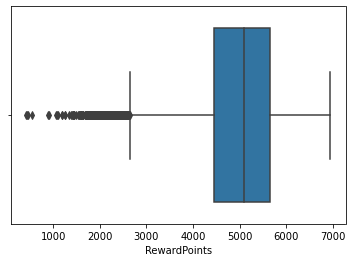

In [26]:
# Boxplots

# RewardPoints , Amenities, Staff, PriceQuality, CheckOut, Cleanliness
# OnlineBooking, RoomSpace, BarService

sns.boxplot(data = bookme_data, x = 'RewardPoints') # possible outliers?
#sns.boxplot(data = bookme_data, x = 'Amenities') # ok
#sns.boxplot(data = bookme_data, x = 'Staff') # ok
#sns.boxplot(data = bookme_data, x = 'PriceQuality') # one outlier?
#sns.boxplot(data = bookme_data, x = 'CheckOut') # ok
#sns.boxplot(data = bookme_data, x = 'Cleanliness') # ok
#sns.boxplot(data = bookme_data, x = 'OnlineBooking') # ok
#sns.boxplot(data = bookme_data, x = 'RoomSpace') # ok
#sns.boxplot(data = bookme_data, x = 'BarService') # ok

<AxesSubplot:xlabel='PriceQuality', ylabel='Count'>

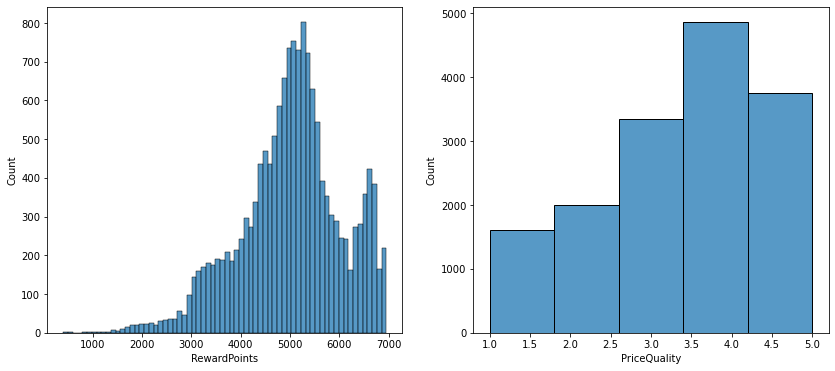

In [27]:
# Histograms

fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.histplot(ax = axes[0], data = bookme_data, x = 'RewardPoints') # podem exisir de facto alguns outliers para RewardPoints a
                                                                   # cerca de 500-1000 -> remover se forem inferiores a 3% das
                                                                   # observações e se de facto não fizer sentido haver clientes
                                                                   # com um número baixo de RewardPoints
sns.histplot(ax = axes[1], data = bookme_data, x = 'PriceQuality', bins = 5) # histograma não indica a possível existência de
                                                                             # outliers

In [28]:
# Podemos tratar os possíveis outliers relacionados com a variável RewardPoints

bookme_data.query('RewardPoints <= 1000')

# Na verdade, quem tem os RewardPoints mais baixos são, na maioria, pessoas há mais de um ano no serviço, que até têm mais
# 'no churn' do que 'churn', e que tanto viajaram por negócios e lazer e ficaram em diferentes tipos de quartos. Dão classifi-
# cações variadas nos parâmetros relativos à satisfação.

print(((bookme_data.query('RewardPoints <= 1000')).shape[0]/bookme_data.shape[0])*100 < 3)
# RewardPoints <= 1000 -> apenas 6 observações em 15586, logo < 3% da amostra, pelo que poderiam ser eliminados

# Tendo em conta a narrativa que, para já, estamos a fazer do negócio. não vamos descartar estes possíveis outliers. Podemos
# considerar que os RewardPoints são atribuídos pela BookMe aos clientes e podem ser gastos noutro tipo de serviços 'extra'.
# Assim, é válido existirem situações em que o número de RewardPoints é baixo, pois os clientes podem tê-los já descontados.

True


In [29]:
# Não esquecer outros potenciais outliers que para já não estamos a considerar:
# Clientes que respondem com classificação 0 em todas as variáveis relativas à satisfação
# Clientes que respondem com classificação 5 em todas as variáveis relativas à satisfação

4.2. Missing Values

In [30]:
bookme_data.isna().sum()

Churn                  0
Name                   0
Longevity              0
Year_Birth           195
TypeTravel             0
RoomType               0
RewardPoints           0
Comfort                0
ReceptionSchedule      0
FoodDrink              0
Location               0
Wifi                   0
Amenities              0
Staff                  0
OnlineBooking          0
PriceQuality           0
RoomSpace              0
CheckOut               0
Checkin                0
Cleanliness            0
BarService             0
dtype: int64

In [11]:
# Year_Birth

bookme_data[bookme_data['Year_Birth'].isna()]

# Estes missing values têm de ser substituídos e podemos usar o KNN Imputer para o fazer. O KNN Imputer vai assignar a cada um
# dos registos que têm o ano de nascimento como NaN o mesmo ano de nascimento da instância que é mais semelhante com esta.
# Podemos aplicar desde logo o KNN Imputer, mas visto que o algoritmo faz a substituição dos NaN com base num critério de
# distância entre registos, talvez seja uma boa ideia tentar normalizá-los primeiro, para que não haja nenhuma variável a ter
# mais ênfase que outra neste processo.

# Futuramente, até podemos descobrir que poderá não fazer sentido realizar esta normalização antes de aplicar o KNN Imputer.
# Tudo dependerá das primeiras conclusões que retirarmos dos resultados do algoritmo de clustering.

# Uma vez que vamos calcular uma nova variável 'Age' a partir de 'Year_Birth', com base no que foi descrito acima, a
# substituição dos missing values com recurso ao KNN Imputer é feita na variável da idade.

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
27,nochurn,Ms. Emily Thomas,yes,NaN,leisure,double,4760,0,5,0,...,5,0,3,5,4,4,5,4,4,5
126,churn,Ms. Elizabeth Tyler,yes,NaN,business,double,5151,2,2,2,...,2,2,2,2,3,4,3,2,4,2
147,nochurn,Ms. Elizabeth Santos,no,NaN,business,single,5370,4,4,4,...,2,4,2,2,5,4,4,4,4,2
168,nochurn,Ms. Elizabeth Lawson,yes,NaN,business,single,3669,1,1,1,...,5,5,5,5,4,5,5,4,4,5
170,nochurn,Ms. Elizabeth Morgan,yes,NaN,business,single,4593,1,1,1,...,2,4,5,4,4,4,5,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15279,nochurn,Ms. Elizabeth Williams,yes,NaN,leisure,double,5769,0,4,0,...,3,4,1,2,2,0,2,5,2,2
15302,churn,Mr. Edward Randall,y,NaN,leisure,double,4196,4,5,5,...,1,5,1,1,5,4,4,3,4,1
15388,nochurn,Ms. Elizabeth Carrillo,yes,NaN,business,single,6448,3,3,3,...,4,5,4,5,5,5,5,3,5,5
15445,nochurn,Ms. Elizabeth Wilson,yes,NaN,business,single,5438,4,4,5,...,5,5,5,5,4,4,5,4,4,5


4.3. Data Transformation

4.3.1. Misclassifications

In [10]:
# Wifi
# Para as observações que têm esta variável preenchida com a classificação '6', substituir por '5' que é o máximo permitido

bookme_data['Wifi'] = bookme_data['Wifi'].replace(6,5)
bookme_data['Wifi'].value_counts()

4    3703
5    3481
3    3347
2    3245
1    1792
0      18
Name: Wifi, dtype: int64

In [11]:
# Longevity
# Para as observações que têm esta variável preenchida com o valor 'y', substituir por 'yes', que neste caso é o valor mais
# frequente

bookme_data['Longevity'] = bookme_data['Longevity'].replace('y',bookme_data['Longevity'].value_counts().idxmax())
bookme_data['Longevity'].value_counts()

yes    12712
no      2874
Name: Longevity, dtype: int64

4.3.2. Create New Variables

In [12]:
# Age
# Calcular a idade a partir do ano de nascimento (Year_Birth)

from datetime import date
bookme_data['Age'] = date.today().year - bookme_data['Year_Birth']
bookme_data

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Age
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,3,4,3,3,3,3,4,3,4,48.0
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,3,4,5,5,5,5,1,5,2,57.0
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,4,4,3,3,2,3,2,3,1,49.0
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,5,4,4,4,4,4,4,3,29.0
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,3,4,1,3,5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,2,4,3,4,5,1,3,4,3,34.0
15585,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,3,5,5,3,1,3,4,4,5,22.0
15586,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,4,5,4,4,4,4,5,4,4,58.0
15587,nochurn,Mr. Gregory Moran,yes,1992.0,leisure,double,5155,4,3,4,...,4,5,5,2,5,4,3,4,5,30.0


In [13]:
# Avaliação média (Overall_Satisfaction)
# Decidiu criar-se uma variável "Overall_Satisfaction" que, para cada registo, faz a média das classificações atribuídas
# em cada uma das variáveis de satisfação. Funciona como um indicador global de satisfação, à semelhança do que existe, por
# exemplo, no Booking.

# Eventualmente, no futuro, pode vir a fazer-se uma média ponderada, consoante se perceba através de uma exploração mais
# completa dos dados que há variáveis de satisfação mais relevantes para o clustering do que outras, ou mesmo ajustando com o
# que pode fazer mais sentido de um ponto de vista de negócio.

bookme_data['Overall_Satisfaction'] = (bookme_data['Comfort'] + bookme_data['ReceptionSchedule'] + bookme_data['FoodDrink'] + bookme_data['Location'] + bookme_data['Wifi'] + bookme_data['Amenities'] + bookme_data['Staff'] + bookme_data['OnlineBooking'] + bookme_data['PriceQuality'] + bookme_data['RoomSpace'] + bookme_data['CheckOut'] + bookme_data['Checkin'] + bookme_data['Cleanliness'] + bookme_data['BarService'])/14

##MF## Criei variáveis intermédias de classificação agregada intermédias

bookme_data['Staff_Related'] = (bookme_data['ReceptionSchedule'] + bookme_data['Staff'] + bookme_data['OnlineBooking'] + bookme_data['CheckOut'] + bookme_data['Checkin'])/5
bookme_data['Room_Related'] = (bookme_data['Comfort'] + bookme_data['Amenities'] + bookme_data['RoomSpace'] + bookme_data['Cleanliness'])/4
bookme_data['Bar_Related'] = (bookme_data['FoodDrink'] + bookme_data['Wifi'] + bookme_data['BarService'])/3

bookme_data

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Age,Overall_Satisfaction,Staff_Related,Room_Related,Bar_Related
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,3,3,4,3,4,48.0,3.285714,3.6,3.00,3.000000
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,5,1,5,2,57.0,3.142857,3.2,3.50,2.666667
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,2,3,2,3,1,49.0,2.714286,3.0,3.00,1.666667
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,4,4,3,29.0,3.142857,3.6,3.25,2.666667
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,3,4,1,3,5,33.0,3.571429,3.4,3.25,4.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,5,1,3,4,3,34.0,2.714286,2.2,3.25,2.666667
15585,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,1,3,4,4,5,22.0,3.571429,4.0,2.75,4.333333
15586,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,4,4,5,4,4,58.0,3.214286,3.8,3.25,2.666667
15587,nochurn,Mr. Gregory Moran,yes,1992.0,leisure,double,5155,4,3,4,...,5,4,3,4,5,30.0,4.071429,4.0,4.25,4.666667


In [14]:
bookme_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15586 entries, 0 to 15588
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Churn                 15586 non-null  object 
 1   Name                  15586 non-null  object 
 2   Longevity             15586 non-null  object 
 3   Year_Birth            15391 non-null  float64
 4   TypeTravel            15586 non-null  object 
 5   RoomType              15586 non-null  object 
 6   RewardPoints          15586 non-null  int64  
 7   Comfort               15586 non-null  int64  
 8   ReceptionSchedule     15586 non-null  int64  
 9   FoodDrink             15586 non-null  int64  
 10  Location              15586 non-null  int64  
 11  Wifi                  15586 non-null  int64  
 12  Amenities             15586 non-null  int64  
 13  Staff                 15586 non-null  int64  
 14  OnlineBooking         15586 non-null  int64  
 15  PriceQuality       

In [15]:
# Gender
#Criar uma coluna relativamente ao género (Feminino ou Masculino) com base no prefixo 'Mr.' ou 'Ms.' no nome do cliente

gender=bookme_data['Name'].str.split(' ',expand = True,n=1)[0]
bookme_data['Gender']=gender
bookme_data['Gender']=bookme_data['Gender'].map({'Ms.': 'F', 'Mr.': 'M'})
bookme_data

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,CheckOut,Checkin,Cleanliness,BarService,Age,Overall_Satisfaction,Staff_Related,Room_Related,Bar_Related,Gender
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,3,4,3,4,48.0,3.285714,3.6,3.00,3.000000,F
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,1,5,2,57.0,3.142857,3.2,3.50,2.666667,M
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,3,2,3,1,49.0,2.714286,3.0,3.00,1.666667,M
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,4,3,29.0,3.142857,3.6,3.25,2.666667,F
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,4,1,3,5,33.0,3.571429,3.4,3.25,4.333333,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,1,3,4,3,34.0,2.714286,2.2,3.25,2.666667,F
15585,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,3,4,4,5,22.0,3.571429,4.0,2.75,4.333333,F
15586,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,4,5,4,4,58.0,3.214286,3.8,3.25,2.666667,M
15587,nochurn,Mr. Gregory Moran,yes,1992.0,leisure,double,5155,4,3,4,...,4,3,4,5,30.0,4.071429,4.0,4.25,4.666667,M


4.3.3. Incoherencies and Reclassifications

In [ ]:
# Year_Birth
# É atípico que haja registo de clientes nascidos, por exemplo, em 2014 ou datas próximas dessa (<16 anos).
# Podem existir diferentes cenários - os pais podem colocar a avaliação em nome dos filhos, pode existir um engano no
# preenchimento, podem corresponder mesmo a clientes jovens, etc. Pela análise feita a este subset de clientes, observou-se que
# a maioria (etre 70% e 80%) viaja em laser, tem longevidade associada e fica hospedada em quartos duplos, o que parece ser
# consistente com a descrição de famílias. Analisando as variáveis numéricas, não pareceram existir diferenças significativas
# relativamente ao subset inicial dos dados.

4.3.4. Binning

In [16]:
# RewardPoints
# Observou-se que a variável RewardPoints não apresentava correlações moderadas ou elevadas com nenhuma outra variável. Uma vez
# que pode existir um largo 'range' de RewardPoints possível e que consideramos que estes são atribuídos aos clientes pela
# BookMe, podemos criar bins para repartir os clientes consoante o número de RewardPoints. Neste caso, criei 4 bins e atribuí
# as designações 'bronze', 'silver', 'gold' e 'platinum', conforme muitas vezes se costuma fazer nestes sistemas de atribuição
# de pontos. Um cliente 'platinum' tem muitos para gastar; o 'bronze' tem poucos.

bookme_data['RewardPoints_Bins'] = pd.cut(bookme_data['RewardPoints'], 4, labels=["bronze", "silver", "gold", "platinum"])
bookme_data

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Checkin,Cleanliness,BarService,Age,Overall_Satisfaction,Staff_Related,Room_Related,Bar_Related,Gender,RewardPoints_Bins
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,48.0,3.285714,3.6,3.00,3.000000,F,gold
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,1,5,2,57.0,3.142857,3.2,3.50,2.666667,M,platinum
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,2,3,1,49.0,2.714286,3.0,3.00,1.666667,M,gold
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,3,29.0,3.142857,3.6,3.25,2.666667,F,gold
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,1,3,5,33.0,3.571429,3.4,3.25,4.333333,M,platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,3,4,3,34.0,2.714286,2.2,3.25,2.666667,F,gold
15585,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,4,4,5,22.0,3.571429,4.0,2.75,4.333333,F,gold
15586,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,5,4,4,58.0,3.214286,3.8,3.25,2.666667,M,gold
15587,nochurn,Mr. Gregory Moran,yes,1992.0,leisure,double,5155,4,3,4,...,3,4,5,30.0,4.071429,4.0,4.25,4.666667,M,gold


4.3.5. Power Transform

In [ ]:
# Verificou-se anteriormente que não existe nenhuma variável altamente skewed, e até que os dados seguiam um perfil semelhante
# ao normal para muitas das variáveos. Por isso, não se justifica aplicar nenhuma transformada deste género para forçar/melhorar
# as distribuições dos dados nas suas várias dimensões.

4.4. Data Reduction

4.4.1. Check for multicolinearity and drop variables

In [ ]:
# Ao analisar a correlação entre as variáveis, verificou-se que:
    # Comfort and FoodDrink - high positive correlation of 0.7
    # Staff and BarService - high positive correlation of 0.7
    # OnlineBooking and BarService - high positve correlation of 0.7
# Podemos fazer drop de algumas destas variáveis, tentando perceber de um ponto de vista de negócio o que pode ser mais
# relevante (tendo em conta que a maioria das pessoas viaja mais por motivos de trabalho e fica alojada maioritariamente em
# quartos singles e doubles, as idades dos clientes, a longevidade...). Como o BarService est+a correlacionado positivamente com
# duas outras variáveis, talvez seja possível eliminá-lo da análise.

In [17]:
# Fazer drop de 'Name' (temos o índice da tabela, que funciona como um ID, e cujo o detalhe vai à estadia; o nome do cliente
# acaba por se tornar irrelevante, até porque dele também já extraímos o género)

bookme_data_drop = bookme_data.drop('Name', axis = 1)
bookme_data_drop

,Churn,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Checkin,Cleanliness,BarService,Age,Overall_Satisfaction,Staff_Related,Room_Related,Bar_Related,Gender,RewardPoints_Bins
0,churn,yes,1974.0,business,single,4907,3,4,1,4,...,4,3,4,48.0,3.285714,3.6,3.00,3.000000,F,gold
1,nochurn,yes,1965.0,business,single,6724,1,1,1,1,...,1,5,2,57.0,3.142857,3.2,3.50,2.666667,M,platinum
2,churn,yes,1973.0,business,single,4365,3,3,3,3,...,2,3,1,49.0,2.714286,3.0,3.00,1.666667,M,gold
3,nochurn,yes,1993.0,leisure,double,3849,1,1,1,1,...,4,4,3,29.0,3.142857,3.6,3.25,2.666667,F,gold
4,nochurn,yes,1989.0,business,single,5376,2,2,3,2,...,1,3,5,33.0,3.571429,3.4,3.25,4.333333,M,platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,no,1988.0,business,double,4968,2,0,2,2,...,3,4,3,34.0,2.714286,2.2,3.25,2.666667,F,gold
15585,churn,no,2000.0,business,double,4970,3,3,3,3,...,4,4,5,22.0,3.571429,4.0,2.75,4.333333,F,gold
15586,nochurn,yes,1964.0,business,single,4046,1,1,1,1,...,5,4,4,58.0,3.214286,3.8,3.25,2.666667,M,gold
15587,nochurn,yes,1992.0,leisure,double,5155,4,3,4,4,...,3,4,5,30.0,4.071429,4.0,4.25,4.666667,M,gold


In [18]:
# Fazer drop de "Year_Birth" (já calculámos a idade a partir desta variável)

bookme_data_drop.drop('Year_Birth', axis = 1, inplace=True)
bookme_data_drop

,Churn,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,...,Checkin,Cleanliness,BarService,Age,Overall_Satisfaction,Staff_Related,Room_Related,Bar_Related,Gender,RewardPoints_Bins
0,churn,yes,business,single,4907,3,4,1,4,4,...,4,3,4,48.0,3.285714,3.6,3.00,3.000000,F,gold
1,nochurn,yes,business,single,6724,1,1,1,1,5,...,1,5,2,57.0,3.142857,3.2,3.50,2.666667,M,platinum
2,churn,yes,business,single,4365,3,3,3,3,1,...,2,3,1,49.0,2.714286,3.0,3.00,1.666667,M,gold
3,nochurn,yes,leisure,double,3849,1,1,1,1,4,...,4,4,3,29.0,3.142857,3.6,3.25,2.666667,F,gold
4,nochurn,yes,business,single,5376,2,2,3,2,5,...,1,3,5,33.0,3.571429,3.4,3.25,4.333333,M,platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,no,business,double,4968,2,0,2,2,3,...,3,4,3,34.0,2.714286,2.2,3.25,2.666667,F,gold
15585,churn,no,business,double,4970,3,3,3,3,5,...,4,4,5,22.0,3.571429,4.0,2.75,4.333333,F,gold
15586,nochurn,yes,business,single,4046,1,1,1,1,3,...,5,4,4,58.0,3.214286,3.8,3.25,2.666667,M,gold
15587,nochurn,yes,leisure,double,5155,4,3,4,4,5,...,3,4,5,30.0,4.071429,4.0,4.25,4.666667,M,gold


In [19]:
# Fazer drop de "RewardPoints" (já criámos os bins que agregam a informação)

bookme_data_drop.drop('RewardPoints', axis = 1, inplace=True)
bookme_data_drop

,Churn,Longevity,TypeTravel,RoomType,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,...,Checkin,Cleanliness,BarService,Age,Overall_Satisfaction,Staff_Related,Room_Related,Bar_Related,Gender,RewardPoints_Bins
0,churn,yes,business,single,3,4,1,4,4,3,...,4,3,4,48.0,3.285714,3.6,3.00,3.000000,F,gold
1,nochurn,yes,business,single,1,1,1,1,5,3,...,1,5,2,57.0,3.142857,3.2,3.50,2.666667,M,platinum
2,churn,yes,business,single,3,3,3,3,1,4,...,2,3,1,49.0,2.714286,3.0,3.00,1.666667,M,gold
3,nochurn,yes,leisure,double,1,1,1,1,4,4,...,4,4,3,29.0,3.142857,3.6,3.25,2.666667,F,gold
4,nochurn,yes,business,single,2,2,3,2,5,5,...,1,3,5,33.0,3.571429,3.4,3.25,4.333333,M,platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,no,business,double,2,0,2,2,3,2,...,3,4,3,34.0,2.714286,2.2,3.25,2.666667,F,gold
15585,churn,no,business,double,3,3,3,3,5,3,...,4,4,5,22.0,3.571429,4.0,2.75,4.333333,F,gold
15586,nochurn,yes,business,single,1,1,1,1,3,4,...,5,4,4,58.0,3.214286,3.8,3.25,2.666667,M,gold
15587,nochurn,yes,leisure,double,4,3,4,4,5,4,...,3,4,5,30.0,4.071429,4.0,4.25,4.666667,M,gold


In [20]:
bookme_data_drop.isna().sum()

# É de notar que continuamos a ter os missing values, para os registos que tinham anteriormente o 'Year_Birth' a missing. Vamos
# substituir estes missing values posteriormente, depois da normalização, como explicado anteriormente.

Churn                     0
Longevity                 0
TypeTravel                0
RoomType                  0
Comfort                   0
ReceptionSchedule         0
FoodDrink                 0
Location                  0
Wifi                      0
Amenities                 0
Staff                     0
OnlineBooking             0
PriceQuality              0
RoomSpace                 0
CheckOut                  0
Checkin                   0
Cleanliness               0
BarService                0
Age                     195
Overall_Satisfaction      0
Staff_Related             0
Room_Related              0
Bar_Related               0
Gender                    0
RewardPoints_Bins         0
dtype: int64

4.3.6. Creating Dummy Variables

In [21]:
# RewardPoints (bins)
# Uma vez que a cada bin atribuído anteriormente corresponde uma ordem, aplicamos um 'ordinal encoding'.

####MF####
# Cuidado com esta linha. Não está a fazer uma cópia mas sim uma referência. Para cópia é necessário ser:
bookme_data_dummies = bookme_data_drop.copy()
# bookme_data_dummies = bookme_data_drop
####MF####

bookme_data_dummies['RewardPoints_Bins'] = bookme_data_dummies['RewardPoints_Bins'].replace('bronze',0).replace('silver',1).replace('gold',2).replace('platinum',3)
bookme_data_dummies['RewardPoints_Bins'] = bookme_data_dummies['RewardPoints_Bins'].astype('int')
#bookme_data['RewardPoints_Bins'].dtype
bookme_data_dummies

,Churn,Longevity,TypeTravel,RoomType,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,...,Checkin,Cleanliness,BarService,Age,Overall_Satisfaction,Staff_Related,Room_Related,Bar_Related,Gender,RewardPoints_Bins
0,churn,yes,business,single,3,4,1,4,4,3,...,4,3,4,48.0,3.285714,3.6,3.00,3.000000,F,2
1,nochurn,yes,business,single,1,1,1,1,5,3,...,1,5,2,57.0,3.142857,3.2,3.50,2.666667,M,3
2,churn,yes,business,single,3,3,3,3,1,4,...,2,3,1,49.0,2.714286,3.0,3.00,1.666667,M,2
3,nochurn,yes,leisure,double,1,1,1,1,4,4,...,4,4,3,29.0,3.142857,3.6,3.25,2.666667,F,2
4,nochurn,yes,business,single,2,2,3,2,5,5,...,1,3,5,33.0,3.571429,3.4,3.25,4.333333,M,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,no,business,double,2,0,2,2,3,2,...,3,4,3,34.0,2.714286,2.2,3.25,2.666667,F,2
15585,churn,no,business,double,3,3,3,3,5,3,...,4,4,5,22.0,3.571429,4.0,2.75,4.333333,F,2
15586,nochurn,yes,business,single,1,1,1,1,3,4,...,5,4,4,58.0,3.214286,3.8,3.25,2.666667,M,2
15587,nochurn,yes,leisure,double,4,3,4,4,5,4,...,3,4,5,30.0,4.071429,4.0,4.25,4.666667,M,2


In [22]:
# Churn ('churn' ou 'nochurn')
# Longevity ('yes' ou 'no')
# TypeTravel ('business' ou 'leisure')
# RoomType ('double', 'single' ou 'suite')
# Gender ('M' ou 'F')

bookme_data_dummies = pd.get_dummies(bookme_data_dummies)
bookme_data_dummies.columns

# Criamos os dummies sem a condição 'drop_first = True' devido à variável 'RoomType' que pode assumir 3 valores possíveis.
# Ao realizar este passo, ficamos com variáveis redundantes para as restantes variáveis categóricas que são binárias. Logo,
# fazemos drop de um dos dummies associados a esta variável, para que não haja redundância no data set.

bookme_data_dummies.drop('Churn_churn', axis = 1, inplace=True)
bookme_data_dummies.drop('Longevity_no', axis = 1, inplace=True)
bookme_data_dummies.drop('TypeTravel_business', axis = 1, inplace=True)
bookme_data_dummies.drop('Gender_F', axis = 1, inplace=True)
bookme_data_dummies

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,...,Room_Related,Bar_Related,RewardPoints_Bins,Churn_nochurn,Longevity_yes,TypeTravel_leisure,RoomType_double,RoomType_single,RoomType_suite,Gender_M
0,3,4,1,4,4,3,4,3,3,3,...,3.00,3.000000,2,0,1,0,0,1,0,0
1,1,1,1,1,5,3,4,5,5,5,...,3.50,2.666667,3,1,1,0,0,1,0,1
2,3,3,3,3,1,4,4,3,3,2,...,3.00,1.666667,2,0,1,0,0,1,0,1
3,1,1,1,1,4,4,5,4,4,4,...,3.25,2.666667,2,1,1,1,1,0,0,0
4,2,2,3,2,5,5,5,5,5,3,...,3.25,4.333333,3,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,2,0,2,2,3,2,4,3,4,5,...,3.25,2.666667,2,0,0,0,1,0,0,0
15585,3,3,3,3,5,3,5,5,3,1,...,2.75,4.333333,2,0,0,0,1,0,0,0
15586,1,1,1,1,3,4,5,4,4,4,...,3.25,2.666667,2,1,1,0,0,1,0,1
15587,4,3,4,4,5,4,5,5,2,5,...,4.25,4.666667,2,1,1,1,1,0,0,1


In [23]:
# Rever a informação geral sobre as variáveis que temos a

bookme_data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15586 entries, 0 to 15588
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Comfort               15586 non-null  int64  
 1   ReceptionSchedule     15586 non-null  int64  
 2   FoodDrink             15586 non-null  int64  
 3   Location              15586 non-null  int64  
 4   Wifi                  15586 non-null  int64  
 5   Amenities             15586 non-null  int64  
 6   Staff                 15586 non-null  int64  
 7   OnlineBooking         15586 non-null  int64  
 8   PriceQuality          15586 non-null  int64  
 9   RoomSpace             15586 non-null  int64  
 10  CheckOut              15586 non-null  int64  
 11  Checkin               15586 non-null  int64  
 12  Cleanliness           15586 non-null  int64  
 13  BarService            15586 non-null  int64  
 14  Age                   15391 non-null  float64
 15  Overall_Satisfactio

4.3. Back to Data Transformation

4.3.7. Scaling

In [25]:
# Aplicar MinMaxScaler (por exemplo)

scaled_bookme_data_dummies = MinMaxScaler().fit_transform(bookme_data_dummies)
scaled_bookme_data_dummies

array([[0.6, 0.8, 0.2, ..., 1. , 0. , 0. ],
       [0.2, 0.2, 0.2, ..., 1. , 0. , 1. ],
       [0.6, 0.6, 0.6, ..., 1. , 0. , 1. ],
       ...,
       [0.2, 0.2, 0.2, ..., 1. , 0. , 1. ],
       [0.8, 0.6, 0.8, ..., 0. , 0. , 1. ],
       [0.6, 0.6, 0.6, ..., 0. , 1. , 1. ]])

In [26]:
# Uma vez que o MinMaxScaler retorna como output um array e não um data frame, temos de criar a partir dele um novo data frame

cols = bookme_data_dummies.columns
scaled_bookme_data_dummies = pd.DataFrame(scaled_bookme_data_dummies, columns = cols)
scaled_bookme_data_dummies

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,...,Room_Related,Bar_Related,RewardPoints_Bins,Churn_nochurn,Longevity_yes,TypeTravel_leisure,RoomType_double,RoomType_single,RoomType_suite,Gender_M
0,0.6,0.8,0.2,0.75,0.8,0.6,0.75,0.6,0.50,0.6,...,0.555556,0.571429,0.666667,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.2,0.2,0.2,0.00,1.0,0.6,0.75,1.0,1.00,1.0,...,0.666667,0.500000,1.000000,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.6,0.6,0.6,0.50,0.2,0.8,0.75,0.6,0.50,0.4,...,0.555556,0.285714,0.666667,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.2,0.2,0.2,0.00,0.8,0.8,1.00,0.8,0.75,0.8,...,0.611111,0.500000,0.666667,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,0.4,0.4,0.6,0.25,1.0,1.0,1.00,1.0,1.00,0.6,...,0.611111,0.857143,1.000000,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,0.4,0.0,0.4,0.25,0.6,0.4,0.75,0.6,0.75,1.0,...,0.611111,0.500000,0.666667,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15582,0.6,0.6,0.6,0.50,1.0,0.6,1.00,1.0,0.50,0.2,...,0.500000,0.857143,0.666667,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15583,0.2,0.2,0.2,0.00,0.6,0.8,1.00,0.8,0.75,0.8,...,0.611111,0.500000,0.666667,1.0,1.0,0.0,0.0,1.0,0.0,1.0
15584,0.8,0.6,0.8,0.75,1.0,0.8,1.00,1.0,0.25,1.0,...,0.833333,0.928571,0.666667,1.0,1.0,1.0,1.0,0.0,0.0,1.0


4.3.8. Applying KNN-Imputer

In [27]:
scaled_bookme_data_dummies.info()
scaled_bookme_data_dummies.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15586 entries, 0 to 15585
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Comfort               15586 non-null  float64
 1   ReceptionSchedule     15586 non-null  float64
 2   FoodDrink             15586 non-null  float64
 3   Location              15586 non-null  float64
 4   Wifi                  15586 non-null  float64
 5   Amenities             15586 non-null  float64
 6   Staff                 15586 non-null  float64
 7   OnlineBooking         15586 non-null  float64
 8   PriceQuality          15586 non-null  float64
 9   RoomSpace             15586 non-null  float64
 10  CheckOut              15586 non-null  float64
 11  Checkin               15586 non-null  float64
 12  Cleanliness           15586 non-null  float64
 13  BarService            15586 non-null  float64
 14  Age                   15391 non-null  float64
 15  Overall_Satisfactio

Comfort                   0
ReceptionSchedule         0
FoodDrink                 0
Location                  0
Wifi                      0
Amenities                 0
Staff                     0
OnlineBooking             0
PriceQuality              0
RoomSpace                 0
CheckOut                  0
Checkin                   0
Cleanliness               0
BarService                0
Age                     195
Overall_Satisfaction      0
Staff_Related             0
Room_Related              0
Bar_Related               0
RewardPoints_Bins         0
Churn_nochurn             0
Longevity_yes             0
TypeTravel_leisure        0
RoomType_double           0
RoomType_single           0
RoomType_suite            0
Gender_M                  0
dtype: int64

In [28]:
# Utiliza-se o algoritmo KNN-Imputer para substituir os missing values na coluna 'Age'. A distância calculada entre registos é
# a distância euclideana

# Importar o package

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3, weights="uniform") # escolher o nr de vizinhos e o peso que cada um tem na substituição
imputed_matrix = imputer.fit_transform(scaled_bookme_data_dummies)

bookme_data_cleaned = pd.DataFrame(data=imputed_matrix, columns=scaled_bookme_data_dummies.columns, index=scaled_bookme_data_dummies.index)
bookme_data_cleaned

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,...,Room_Related,Bar_Related,RewardPoints_Bins,Churn_nochurn,Longevity_yes,TypeTravel_leisure,RoomType_double,RoomType_single,RoomType_suite,Gender_M
0,0.6,0.8,0.2,0.75,0.8,0.6,0.75,0.6,0.50,0.6,...,0.555556,0.571429,0.666667,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.2,0.2,0.2,0.00,1.0,0.6,0.75,1.0,1.00,1.0,...,0.666667,0.500000,1.000000,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.6,0.6,0.6,0.50,0.2,0.8,0.75,0.6,0.50,0.4,...,0.555556,0.285714,0.666667,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.2,0.2,0.2,0.00,0.8,0.8,1.00,0.8,0.75,0.8,...,0.611111,0.500000,0.666667,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,0.4,0.4,0.6,0.25,1.0,1.0,1.00,1.0,1.00,0.6,...,0.611111,0.857143,1.000000,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,0.4,0.0,0.4,0.25,0.6,0.4,0.75,0.6,0.75,1.0,...,0.611111,0.500000,0.666667,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15582,0.6,0.6,0.6,0.50,1.0,0.6,1.00,1.0,0.50,0.2,...,0.500000,0.857143,0.666667,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15583,0.2,0.2,0.2,0.00,0.6,0.8,1.00,0.8,0.75,0.8,...,0.611111,0.500000,0.666667,1.0,1.0,0.0,0.0,1.0,0.0,1.0
15584,0.8,0.6,0.8,0.75,1.0,0.8,1.00,1.0,0.25,1.0,...,0.833333,0.928571,0.666667,1.0,1.0,1.0,1.0,0.0,0.0,1.0


In [29]:
# Verificar que já não existem missing values

bookme_data_cleaned.isna().sum()

Comfort                 0
ReceptionSchedule       0
FoodDrink               0
Location                0
Wifi                    0
Amenities               0
Staff                   0
OnlineBooking           0
PriceQuality            0
RoomSpace               0
CheckOut                0
Checkin                 0
Cleanliness             0
BarService              0
Age                     0
Overall_Satisfaction    0
Staff_Related           0
Room_Related            0
Bar_Related             0
RewardPoints_Bins       0
Churn_nochurn           0
Longevity_yes           0
TypeTravel_leisure      0
RoomType_double         0
RoomType_single         0
RoomType_suite          0
Gender_M                0
dtype: int64

###MF###
##### Checking the nº of clusters

In [30]:
from sklearn.cluster import KMeans

In [31]:
ks = range(1,16)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(bookme_data_cleaned)
    inertias.append(model.inertia_)
    

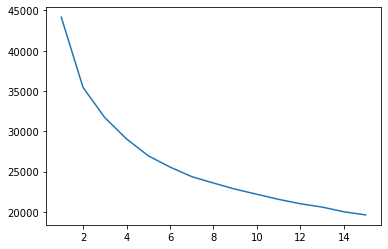

In [32]:
plt.plot(ks, inertias)
# 3 clusters suits best. Check for 4 and 5

In [33]:
# Date with 3 Clusters

df_k3 = bookme_data_cleaned.copy()
model_k3 = KMeans(n_clusters=3, random_state=100).fit(df_k3)
df_k3['label'] = model_k3.labels_

In [34]:
# Data with 4 clusters

df_k4 = bookme_data_cleaned.copy()
model_k4 = KMeans(n_clusters=4, random_state=100).fit(df_k3)
df_k4['label'] = model_k4.labels_

In [41]:
# Compare 3 with 4 clusters

pd.concat([df_k3.groupby(['label']).mean().transpose(),df_k4.groupby(['label']).mean().transpose()], axis=1)

# O que se passa entre cluster 1 e 2 no caso de 4 clusters?
# As Overall Stisfaction, Room e Bar Related são diferentes sendo ambos uma grande percentagem de double rooms
# Ou seja, existe discrepância nos double rooms, sendo os single as melhores pontuações e a pontuação das suites aumenta
# com o decrescer da insatisfação

label,0,1,2,0,1,2,3
Comfort,0.606875,0.628505,0.455720,0.606875,0.716556,0.499209,0.457609
ReceptionSchedule,0.594739,0.682843,0.513771,0.594739,0.625598,0.754569,0.511304
FoodDrink,0.602631,0.576956,0.519280,0.602631,0.640492,0.480931,0.523739
Location,0.498904,0.491479,0.498941,0.498904,0.496094,0.485830,0.498913
Wifi,0.717643,0.678815,0.531907,0.717643,0.731915,0.588313,0.538130
Amenities,0.820309,0.675058,0.499153,0.820309,0.803790,0.487786,0.503043
Staff,0.778499,0.646059,0.421716,0.778499,0.743850,0.488796,0.429728
OnlineBooking,0.819291,0.721379,0.502246,0.819291,0.795878,0.600351,0.507696
PriceQuality,0.752192,0.638797,0.422881,0.752192,0.662733,0.595562,0.422989
RoomSpace,0.793792,0.702053,0.565212,0.793792,0.734641,0.653251,0.564478


#### 3 Clusters

In [42]:
cluster0 = df_k3[df_k3.label==0]
cluster1 = df_k3[df_k3.label==1]
cluster2 = df_k3[df_k3.label==2]

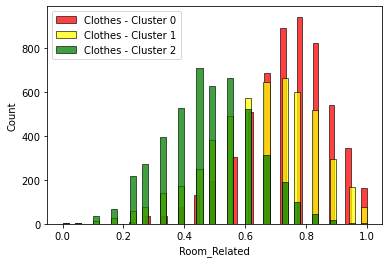

In [47]:
sns.histplot(cluster0['Room_Related'],color='red',label='Clothes - Cluster 0', bins = 50)
sns.histplot(cluster1['Room_Related'],color='yellow',label='Clothes - Cluster 1', bins = 50)
sns.histplot(cluster2['Room_Related'],color='green',label='Clothes - Cluster 2', bins = 50)
plt.legend()

#### 4 clusters

In [98]:
cluster0 = df_k4[df_k4.label==0]
cluster1 = df_k4[df_k4.label==1]
cluster2 = df_k4[df_k4.label==2]
cluster3 = df_k4[df_k4.label==3]

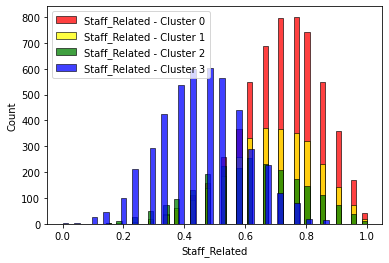

In [99]:
sns.histplot(cluster0['Staff_Related'],color='red',label='Staff_Related - Cluster 0', bins = 50)
sns.histplot(cluster1['Staff_Related'],color='yellow',label='Staff_Related - Cluster 1', bins = 50)
sns.histplot(cluster2['Staff_Related'],color='green',label='Staff_Related - Cluster 2', bins = 50)
sns.histplot(cluster3['Staff_Related'],color='blue',label='Staff_Related - Cluster 3', bins = 50)
plt.legend()


In [61]:
centroids = model_k4.cluster_centers_

In [49]:
bookme_data_cleaned.columns

Index(['Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi',
       'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace',
       'CheckOut', 'Checkin', 'Cleanliness', 'BarService', 'Age',
       'Overall_Satisfaction', 'Staff_Related', 'Room_Related', 'Bar_Related',
       'RewardPoints_Bins', 'Churn_nochurn', 'Longevity_yes',
       'TypeTravel_leisure', 'RoomType_double', 'RoomType_single',
       'RoomType_suite', 'Gender_M'],
      dtype='object')

In [64]:
bookme_data_cleaned.columns.get_loc("Overall_Satisfaction")

15

In [54]:
centroid_0_first = centroids[0,bookme_data_cleaned.columns.get_loc("Staff_Related")]
centroid_1_first = centroids[1,bookme_data_cleaned.columns.get_loc("Staff_Related")]
centroid_2_first = centroids[2,bookme_data_cleaned.columns.get_loc("Staff_Related")]
centroid_3_first = centroids[3,bookme_data_cleaned.columns.get_loc("Staff_Related")]
centroid_0_second = centroids[0,bookme_data_cleaned.columns.get_loc("Overall_Satisfaction")]
centroid_1_second = centroids[1,bookme_data_cleaned.columns.get_loc("Overall_Satisfaction")]
centroid_2_second = centroids[2,bookme_data_cleaned.columns.get_loc("Overall_Satisfaction")]
centroid_3_second = centroids[3,bookme_data_cleaned.columns.get_loc("Overall_Satisfaction")]

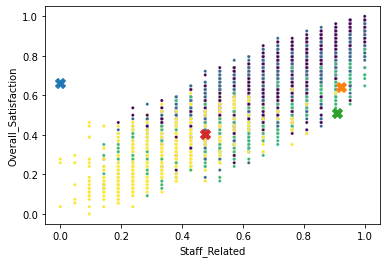

In [96]:
sns.scatterplot(df_k4.Staff_Related, df_k4.Overall_Satisfaction, c=df_k4.label, s=10)
plt.scatter(centroid_0_first, centroid_0_second, marker='X', s=100)
plt.scatter(centroid_1_first, centroid_1_second, marker='X', s=100)
plt.scatter(centroid_2_first, centroid_2_second, marker='X', s=100)
plt.scatter(centroid_3_first, centroid_3_second, marker='X', s=100)
plt.show()

<AxesSubplot:>

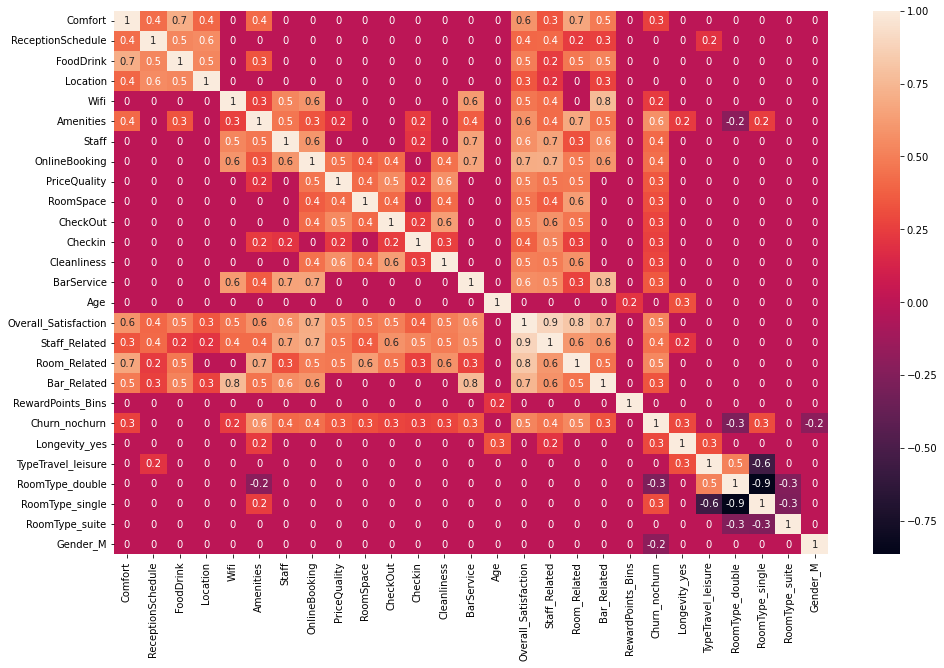

In [100]:
doublerating = (bookme_data_cleaned.corr(method = 'spearman')).applymap(lambda x: 0 if abs(x)<0.2 else x)
figure = plt.figure(figsize=(16,10))
sns.heatmap(doublerating, annot=True, fmt = '.1g')

##### MF: Finished

4.4.2. Apply PCA

In [65]:
# Aplicar o algoritmo de PCA para terminar o processo de Data Reduction

from sklearn.decomposition import PCA

pca = PCA(n_components = 'mle', svd_solver='full') # Minka’s MLE algorithm is used to guess the dimension
pca.fit(bookme_data_cleaned)

PCA(n_components='mle', svd_solver='full')

In [194]:
# Investigar resultados do PCA

# Principal axes in feature space, representing the directions of maximum variance in the data. Equivalently, the right
# singular vectors of the centered input data, parallel to its eigenvectors. The components are sorted by explained_variance_.
# print(pca.components_) # dimensão: n_components x n_components

# The amount of variance explained by each of the selected components. The variance estimation uses n_samples - 1 degrees of
# freedom.
# print(pca.explained_variance_) # dimensão: n_components

# Percentage of variance explained by each of the selected components.
print((pca.explained_variance_ratio_)*100) # dimensão: n_components

# Da análise da percentagem de variância explicada por cada um dos componentes, percebe-se que selecionando os 11 primeiros
# (ou seja, reduzindo o número de colunas do data set original do BookMe para cerca de metade) conseguimos explicar
# aproximadamente 85%-90% da variabilidade/variância observada nos dados.

[23.79877219 15.31573117  9.42905485  8.29611613  7.00149268  6.58134314
  4.63184085  3.57966931  3.33377014  2.57118684  2.32622194  1.91829373
  1.71840325  1.57924682  1.45250168  1.36793318  1.13544612  1.00626247
  0.91557814  0.85048419  0.71486802  0.47578318]


In [196]:
# Aplicar a transformação e converter o resultado num data frame

n_components = 22 # o número total de componentes que foi devolvido do PCA

columns = ['pca_%i' % i for i in range(n_components)]
bookme_data_pca = pd.DataFrame(pca.transform(bookme_data_cleaned), columns=columns, index=bookme_data_cleaned.index)
bookme_data_pca

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21
0,-0.399341,0.510567,0.303045,-0.268166,0.318822,-0.028735,-0.664866,-0.401781,-0.011979,0.184041,...,0.031482,0.028896,0.053948,0.019526,0.028425,0.035708,-0.020953,0.037837,-0.385211,0.130641
1,-0.876616,0.284203,-0.271251,0.985877,-0.144247,-0.120146,0.154686,0.412698,-0.715361,-0.047132,...,-0.017523,-0.115343,0.141504,-0.053236,0.015431,-0.004220,-0.083183,-0.416369,0.040315,-0.078828
2,-0.175911,1.018700,-0.454877,-0.190190,0.321025,-0.095817,-0.010384,-0.077708,-0.244259,-0.308445,...,0.122787,-0.019457,-0.456677,-0.119907,-0.047050,0.006865,0.136083,-0.100438,-0.126154,-0.253185
3,0.382209,-0.961500,0.547553,0.913535,0.187316,-0.139538,0.094417,-0.148069,0.079165,-0.019798,...,-0.034957,0.124238,-0.176033,-0.045315,-0.030457,-0.069583,-0.059284,-0.255894,0.052568,-0.073225
4,-0.968715,0.091886,-0.345293,0.464047,0.223553,0.501377,0.050118,0.297248,-0.513387,-0.202411,...,0.340839,0.010880,-0.035733,-0.068149,0.167768,-0.248069,-0.215109,0.026163,0.166651,0.008497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,0.798463,0.340322,0.951625,0.287280,-0.561332,0.414632,-0.089670,-0.013336,-0.011334,-0.116684,...,-0.060629,0.649953,-0.059153,0.147604,-0.483318,0.054653,0.163961,-0.099195,0.044133,0.082949
15582,0.584352,-0.096850,0.686195,-0.140414,-0.572708,0.959777,-0.542705,-0.207234,0.207850,0.013880,...,0.310485,-0.128724,-0.022899,-0.044464,-0.201704,-0.001455,0.091475,0.014739,0.043013,-0.096362
15583,-0.943124,0.248250,-0.275072,0.975176,0.097779,0.080812,0.226459,-0.139187,0.223395,0.004998,...,-0.041615,0.061951,-0.154972,-0.087498,-0.008005,0.126207,0.061180,0.007799,0.057981,-0.021392
15584,0.341692,-1.068999,-0.629817,0.073511,0.156372,0.564890,0.137799,0.052109,-0.065847,0.059982,...,-0.503564,0.000790,0.003176,0.147028,-0.038946,-0.028321,0.016793,-0.039506,0.066196,-0.013744


In [195]:
# Podemos fazer drop dos componentes que descartámos da análise acima: sabemos que só os 11 primeiros são, à partida, mais
# relevantes (pca_0 ao pca_10), por isso podemos fazer drop dos restantes e "enviar" o data frame resultante para o algoritmo
# de clustering.

# Podemos ainda fazer o profiling destes componentes. Isto pode ajudar-nos a percepcionar ainda melhor quais as variáveis mais
# "relevantes" para o nosso problema de negócio. Este profiling diz-nos, para cada componente, quais as variáveis mais
# determinantes na sua definição.

# Após aplicar o(s) algoritmo(s) de clustering, sabemos que observações estão em que cluster. Podemos regressar ao data frame
# original e fazer a descrição estatística e o profiling dos clusters olhando para essas variáveis.

dtype('float64')

In [ ]:
# Falta: alterar os datatypes (performance issues, apesar de neste contexto talvez não faça muita diferença)